## LAB 2: CHIẾN DỊCH TRUYỀN THÔNG (DATACAMP) 

### 1 - Problem Statement

### 2 - Dataset 
- Dataset called: `sales_df`: contains information on advertising campaign expenditure (chi tiêu của chiến dịch qc) across different media types, and the number of dollars thu về. (4546 mẫu thử căng) Ví dụ 2 rows của dataset: 

|    |      tv     |   radio   |  social_media   |    sales     |
|---:|-----------:|---------:|----------------:|------------:|
|  1 |  13000.0   | 9237.76  | 2409.57         | 46677.90    |
|  2 |  41000.0   | 15886.45 | 2913.41         |150177.83    |


### 3 - 1 FEATURE-TARGET is used to train LINEAR REGRESSION model (radio-sales value)

#### 3.1 - Creating Data

In [2]:
import numpy as np
import pandas as pd  #pip install pandas

sales_df = pd.read_csv("advertising_and_sales_clean.csv")

X = sales_df["radio"].values # feature radio
print(X, X.shape) # -> (4546, )

y = sales_df["sales"].values # target y
#.values converts the resulting DataFrame to a numpy array
# However, when training using Sckit Learn - LinearRegression no need converts 
# Because fit() function handles it perfectly (xử lý được nó 1 cách hoàn toàn) 

# Reshape X (từ 1D sang 2D kích thước n x m n hàng m cột) 
X = X.reshape(-1, 1)
# X = sales_df["radio"].values.reshape(-1, 1)
print(X, X.shape) # -> (4546, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)  # -> (4546, 1) (4546,)
# Khi dùng scikit-learn để train model, features cần được đưa vào mảng 2D, target cần đưa vô 1D)

'''
chatGPT: 
Hàm reshape(): 
- mảng có kích thước (shape) `(n1, n2, ..., nk)`-> (m1, m2, ..., mk),
miễn là `n1 * n2 * ... * nk` giống với nhân tử `m1 * m2 * ... * mk`.

- When điền 1 đối là `-1`. -> numpy sẽ tự động tính đối số đó. 
- `reshape(0, 1)` không hợp lệ vì đối số phải là một số nguyên dương hoặc số âm.
'''

[ 6566.23  9237.76 15886.45 ... 19800.07 17534.64 15966.69] (4546,)
[[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]] (4546, 1)
(4546, 1) (4546,)


'\nchatGPT: \nHàm reshape(): \n- mảng có kích thước (shape) `(n1, n2, ..., nk)`-> (m1, m2, ..., mk),\nmiễn là `n1 * n2 * ... * nk` giống với nhân tử `m1 * m2 * ... * mk`.\n\n- When điền 1 đối là `-1`. -> numpy sẽ tự động tính đối số đó. \n- `reshape(0, 1)` không hợp lệ vì đối số phải là một số nguyên dương hoặc số âm.\n'

#### 3. 2- Building a linear regression model train 1 feature - 1 value

In [3]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the LinearRegression model
reg = LinearRegression()

# Fit the model to the data (fit với đầu vào X, ra y)
reg.fit(X, y) # compute the coefficients (tham số) of model -> predict target from features. Results: Linear Regression model is trained and ready for predictions on neww input values.

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])
'''
-> [ 95491.17119147 117829.51038393 173423.38071499 291603.11444202 111137.28167129] 
-> According Inputvalue radio : 6566.23, model predict value sales 95491.17119147. While actual (thực tế) value sales is only (chỉ là) 54732.76 .
-> Model evaluation (việc đánh giá mô hình) should not only be based (được dựa) on comparing: predictions - actual values.
evaluation needs to be based on many different metrics (nhiều metrics khác nhau) 
to better understand about accuracy (độ chính xác),stability (độ ổn định) of the model.   

Can use various model evaluation methods (1 vài method đánh giá model khác)( mean squared error, R_squared score,..) để đánh giá performance của model.
'''

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


'\n-> [ 95491.17119147 117829.51038393 173423.38071499 291603.11444202 111137.28167129] \n-> According Inputvalue radio : 6566.23, model predict value sales 95491.17119147. While actual (thực tế) value sales is only (chỉ là) 54732.76 .\n-> Model evaluation (việc đánh giá mô hình) should not only be based (được dựa) on comparing: predictions - actual values.\nevaluation needs to be based on many different metrics (nhiều metrics khác nhau) \nto better understand about accuracy (độ chính xác),stability (độ ổn định) of the model.   \n\nCan use various model evaluation methods (1 vài method đánh giá model khác)( mean squared error, R_squared score,..) để đánh giá performance của model.\n'

#### 3.3 - Visualizing linear regression model - train 1 feature - 1 target
- visualize how well the model fits the data (Hình dung mô hình phù hợp với dữ liệu như nào). -> interpret (explain - giải thích) the relationship between radio advertising expenditure and sales values.

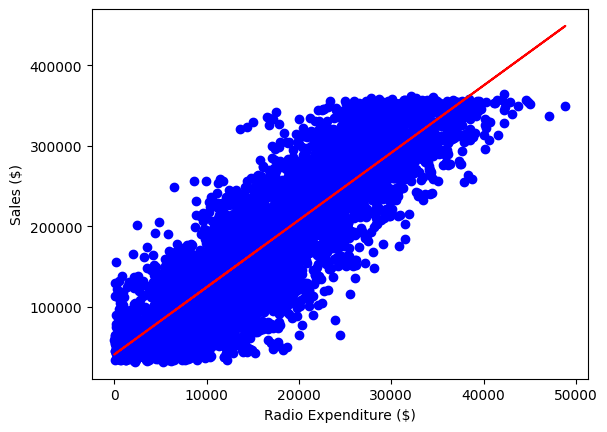

<Axes: >

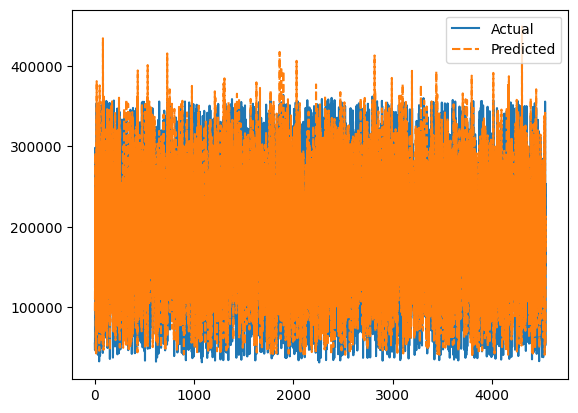

In [4]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt  # pip install matplotlib : data visualization lib -> visualizing data, model, output, ...
                                # Other modules matplotlib : mpl_toolkits, matplotlib.image, matplotlib.gridspec, matplotlib.transforms, matplotlib.animation

# Create scatter plot (show distribution (phân tán) of data points on a plane). 
# Use check relationship bw 2 variables + see: if they are related to each other.
plt.scatter(X, y, color="blue") # visualizing y aggain X 

# Create line plot (draw/plot đường cong on a plane)
# Show the trend, changes values over time (theo thời gian)
plt.plot(X, predictions, color="red")  #red line: visua predictions - again x - vẽ đường cong mà mô hình LinearRegression đã dự đoán
plt.xlabel("Radio Expenditure ($)") # x-axis
plt.ylabel("Sales ($)")       # y-axis

plt.show() #display
# Output: show relationship feature X - target y, the curve(đường cong) that Linear Regression model has predicted (đã dự đoán). 



### 4 - ALL OF FEATURES-TARGET is used to train LINEAR REGRESSION model (all feature-sales value)

#### 4.1 - Linear regression model and fit data (X_train, y_train, X_test, y_test)

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sales_df = pd.read_csv("advertising_and_sales_clean.csv")

# Convert categorical feature to numerical using one-hot encoding
sales_df = pd.get_dummies(sales_df, columns=['influencer']) # pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
# X = sales_df.drop(["sales", "radio", "tv", "social_media"], axis=1) # to check get_dummies oki chưa?

X = sales_df.drop("sales", axis=1)  
y = sales_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
reg = LinearRegression() # Instantiate (Khởi tạo) model
reg.fit(X_train, y_train) # fit model
y_pred = reg.predict(X_test) 
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))



Predictions: [53135.43066453 71060.6004603 ], Actual Values: 471     55261.28
3774    67574.90
Name: sales, dtype: float64


#### 4.2 - Regression performance - Linear regression model performance evaluation' (đánh giá hiệu suất model)
1. Use R-Squared (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Mean Squared Error ( MSE).
2. Use Cross-Validation: 
3. Use chart - visualize:


##### 4.2.1 Use R-Squared (R^2) metric, Root Mean Squared Error (RMSE) metric, Mean Absolute Error (MAE) and Mean Squared Error ( MSE).

Đánh giá hiệu suất của một model thường được thực hiện bằng cách sử dụng các metrics phù hợp để đo lường khả năng dự đoán của model trên tập dữ liệu huấn luyện và kiểm tra. Cùng với đó, một số kỹ thuật khác như cross-validation có thể được sử dụng để đảm bảo rằng model không bị overfitting hay underfitting.

0.9990150033349248 2944.7428499310226


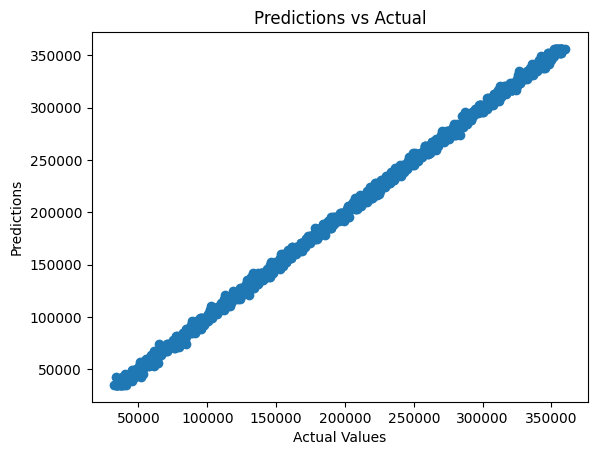

[0.99900902 0.99898731 0.99896881 0.99898621 0.99892599 0.99905996]
0.9989895503853368 4.045978667092115e-05 [0.99893135 0.99905359]


In [6]:
 
from sklearn.metrics import mean_squared_error #metrics: 1 module , mse : 1 funct 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score

r_squared = reg.score(X_test, y_test) # reg == name of model
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print(r_squared, rmse)

# USe Distribution chart predicted-actual value
plt.scatter(y_test, y_pred) # y_pred = reg.predict(X_test)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Predictions vs Actual")
plt.show()

# Cross-validation analysis -> statistics of cross-validation metrics
kf = KFold(n_splits=6, shuffle=True, random_state=42) 
cv_scores = cross_val_score(reg, X, y, cv=kf)
print(cv_scores)
mean_cv_score, std_cv_score, conf_interval = np.mean(cv_scores), np.std(cv_scores), np.percentile(cv_scores, [2.5, 97.5])
print(mean_cv_score, std_cv_score, conf_interval)

###### Nhắc lại tí lý thuyết XSTK
Giải thích đoạn mã trên: 

R_squared = 1 - (SS_res / SS_tot)  # value 0 - 1, 1: model is the best
SS_res = ((y_true - y_pred)**2).sum()   # SS_res (summ of squares of residuals - tổng bình phương các sai số dự đoán)
SS_tot = ((y_true - y_true.mean())**2).sum() # (sum of squares actual value - actual mean value)


1. Standard deviation formula (of a set of values):

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}$$

Trong đó:
- $\bar{x}$ là giá trị trung bình của tập hợp các giá trị.

- This formula calculates the dispersion capacity (khả năng phân tán) of the data, helping to determine (xác định) the difference between data sets.

2. Confidence interval formula of a data set with a reliability $\gamma$ :

$$\text{conf\_interval} = [\bar{x} - z_{\alpha/2}\frac{s}{\sqrt{n}}, \bar{x} + z_{\alpha/2}\frac{s}{\sqrt{n}}]$$

Trong đó:
- $\bar{x}$ là giá trị trung bình của tập hợp các giá trị
- $z_{\alpha/2}$ là giá trị tương ứng trên phân phối chuẩn tiêu chuẩn (standard normal distribution) cho giá trị alpha mà ta muốn sử dụng. Giá trị này có thể được tìm thấy trong bảng Z-score hoặc tính toán tự động bằng phần mềm.
- $s$ là độ lệch chuẩn của tập hợp các giá trị

- This formula calculates the range of values that the average value may fall (nằm trong) within a specified range (1 khoảng xác định) with a given level of confidence (mức độ tin cậy được chỉ định) - statistics; to estimate the mean and other typical values (những loại giá trị khác) of a set of data.

#### 4.3 - REGULARIZED REGRESION Model - MINIMIZE OVERFITTING<[ˈreɡ.jə.lɚ.aɪz]>: (Hồi quy chính quy hóa, hồi quy được điều chuẩn, hồi quy thiết lập tham số, hồi quy kiểm soát) - A TYPE LINEAR REGRESSION 
1. Ridge Regression (Apply L2 Regularization): minimize sum of the square of the parameters (tổng bp của các tham số).
2. Lasso regression (Apply L1 Regularization): minimizing absolute sum of the parameters (tổng trị tuyệt đối) =  reduces the number of input variables (setting the weight of zero) (đưa trọng số 1 số paramaters về 0).  
3. Elasticnet Regression: Combining both 2 types of Regularization.

- Help minimize overfitting; improve performance and accuracy with noise data (data nhiễu)/ number of input variables too large.

- Regularized Regression applies some penalty functions (áp dụng 1 số hàm penalty) to the parameters of the model (tác động hàm lên các tham số), requiring parameters to decrease.

##### 4.3.1 - Ridge Regression: Apply L2 Regularization, try to minimize sum of the square of the parameters (tổng bp của các tham số).

In [7]:
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
  # Create a Ridge regression model
  ridge_reg_model = Ridge(alpha = alpha)
  ''' Ridge loss = RSS (Residual Sum of Squares) + Alpha * Sum of Squares (Weights)
- rss = sum of the square of the error on the training,
- Sum of Squares (Weights) is the sum of the square of the weights in the model.
  '''
  # Fit the data
  ridge_reg_model.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge_reg_model.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

'''
Output: 
[0.9990150033934493, 0.9990150039191462, 0.9990150090764297, 0.9990150521414333, 0.999015182881188, 0.9990152130441597]
- don't change much when alpha increases,
-> features (các tính năng) explain the variance (giải thích) in the target well
- even large coefficients, underfitting doesn't occur!

'''

[0.9990150033934493, 0.9990150039191462, 0.9990150090764297, 0.9990150521414333, 0.999015182881188, 0.9990152130441597]


"\nOutput: \n[0.9990150033934493, 0.9990150039191462, 0.9990150090764297, 0.9990150521414333, 0.999015182881188, 0.9990152130441597]\n- don't change much when alpha increases,\n-> features (các tính năng) explain the variance (giải thích) in the target well\n- even large coefficients, underfitting doesn't occur!\n\n"

##### 4.3.2 - Lasso Regression - identify important features
- 1 type in linear regression identify important features.
- Lasso Regression adjust (điều chinrh) the coefficients of characteristics/features (hệ số của các đặc trưng)-> minimizing overfitting + improve accuracy. (coe ~ 0 -> remove: not affect model).
- For data sets with too many characteristics/features -> focus on the most important features + simplify the model.
- In addition, Lasso Regression can be combined with Cross-Validation (kết hợp với đánh giá chéo = chia nhiều K Folds) -> select the optimal value of Alpha (standard parameter) + identify the characteristics selected more reliable.

[ 3.56256515e+00 -3.91091923e-03  4.48078397e-03  5.20256349e+01
  6.36710895e+01 -2.43916497e+00 -1.94418673e+01]
Index(['tv', 'radio', 'social_media', 'influencer_Macro', 'influencer_Mega',
       'influencer_Micro', 'influencer_Nano'],
      dtype='object')


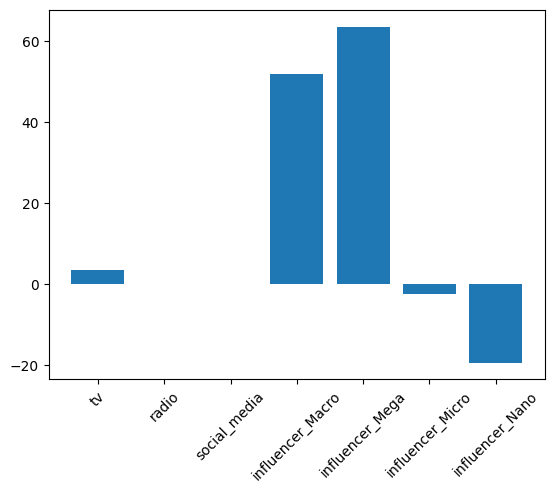

<Axes: >

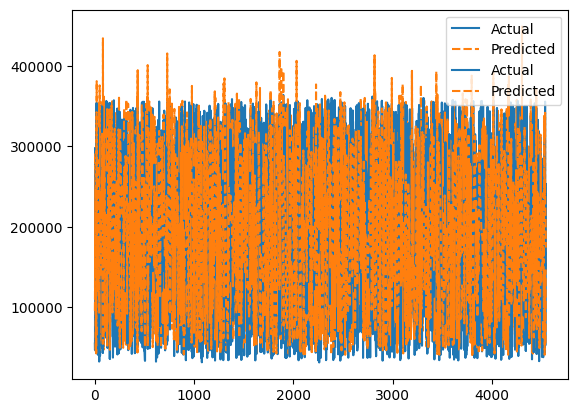

In [11]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate (khởi tạo) a lasso regression model
lasso_reg_model = Lasso(alpha=0.3) # nhiều tham số khác
'''
Alpha: Regularization Strength adjusts (điều chỉnh) the elasticity/regularization (độ co giãn/kiểm soát) of coefficients  
- alpha nhỏ -> model ~ Linear Regression
- Alpha` increases, model is strictly bound (kiểm soát chặt) 
and minimize size coefficients-> avoid overfitting (quá đúng với data train mà ko tổng quát được).
- Alpha` too high -> coefiecient feature~ 0 -> underfitting (no match with train data)
 lại một số điểm nữa cho bạn dễ hiểu hơn:


(input variables) của dữ liệu trước khi truyền vào mô hình. Quá trình này giúp cho các biến có các miền giá trị khác nhau (ví dụ: chiều cao, cân nặng) có thể so sánh được với nhau và tránh ảnh hưởng của các biến có phạm vi giá trị lớn hơn. Khi normalize=True, các giá trị sẽ được chuẩn hoá thành [-1, 1] hoặc [0, 1]. Nếu normalize=False thì sẽ không có bước chuẩn hoá. Việc chuẩn hóa giúp cải thiện độ chính xác và tốc độ tính toán của mô hình.
2 Norrmoneze: standardize input variables, help variables different units can be compared.
-(Example: Height 1-2m, Weight 30-150kg-> Standardizing value: usually [-1 , 1] or [0, 1], -> be compared.
- help Minimize errors and improve performance and calculation speed.
- If  normalize = True, standardized> <Normalize = False is not.
'''

# Fit the model to the data
lasso_reg_model.fit(X, y)

# Compute and print the coefficients (of features)
lasso_coef = lasso_reg_model.coef_
print(lasso_coef)   # [ 3.56256515e+00 -3.91091923e-03  4.48078397e-03  5.20256349e+01
                    # 6.36710895e+01 -2.43916497e+00 -1.94418673e+01]
'''
Có thể có giá trị âm cho các hệ số Lasso 
Các hệ số Lasso âm có thể chỉ ra rằng biến tương ứng không có tác động tích cực đến mô hình 
và nên được loại bỏ hoàn toàn. 
'''

# Create X from all column values except for "sales"
X = sales_df.drop("sales", axis=1)  # DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
                                    # axis = 0(delete row)/1 (delete col)

# List columns:
sales_columns = sales_df.drop("sales", axis = 1).columns
print(sales_columns)    # Index(['tv', 'radio', 'social_media', 'influencer_Macro', 'influencer_Mega',
                        # 'influencer_Micro', 'influencer_Nano'],
                        # dtype='object')

plt.bar(sales_columns, lasso_coef)
# Các cột được lấy từ list các tên cột trong dataframe (sales_columns)
# độ cao = giá trị các hệ số Lasso ước lượng (đc lưu trong list lasso_coef)
plt.xticks(rotation=45) # xoay trục x gì đó để các nhãn ko chồng chéo lên nhau/ko hiển thị đầy đủ trong chart
plt.show()

# line plot: Show different (x:điểm dữ liệu, y:2 value)
import seaborn as sns
results_df = pd.DataFrame({'Actual': y, 'Predicted': predictions})
sns.lineplot(data=results_df[['Actual', 'Predicted']])

results_df_sample = results_df.sample(n=1000, random_state=42) # 1000 random rows
sns.lineplot(data=results_df_sample[['Actual', 'Predicted']])


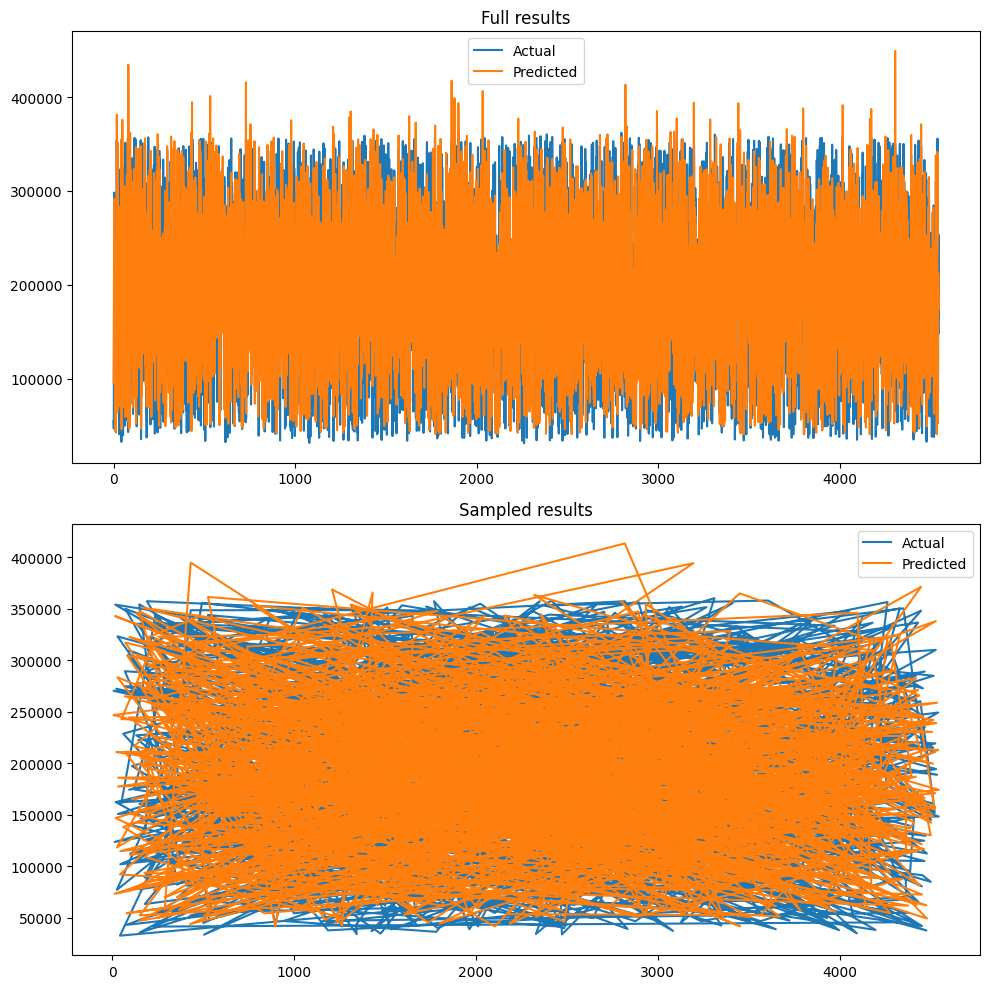

In [12]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({'Actual': y, 'Predicted': predictions})
results_df_sample = results_df.sample(n=1000, random_state=42) # 1000 random rows

# Tạo 2 đối tượng của subplot, tương ứng với 2 đồ thị
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

# Vẽ đồ thị 1
ax1.plot(results_df['Actual'], label='Actual')
ax1.plot(results_df['Predicted'], label='Predicted')
ax1.legend() # chú giải 
ax1.set_title('Full results')

# Vẽ đồ thị 2
ax2.plot(results_df_sample['Actual'], label='Actual')
ax2.plot(results_df_sample['Predicted'], label='Predicted')
ax2.set_title('Sampled results')
ax2.legend()

plt.tight_layout() # để làm cho subplot không bị chồng lên nhau
plt.show()


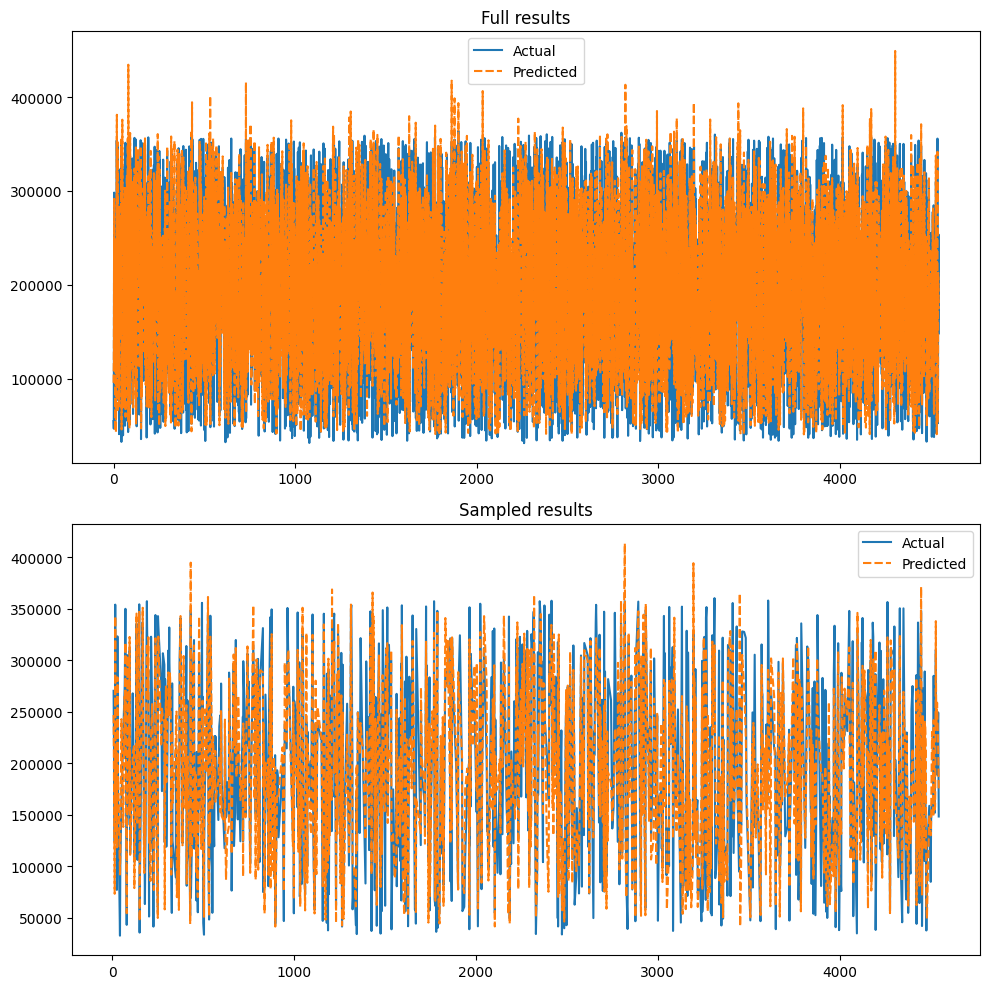

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame({'Actual': y, 'Predicted': predictions})
results_df_sample = results_df.sample(n=1000, random_state=42) # 1000 random rows

# Tạo subplot với 2 hàng và 1 cột
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# Vẽ đồ thị 1 ở hàng 1, cột 1 (index 0)
sns.lineplot(data=results_df[['Actual', 'Predicted']], ax=axs[0])
axs[0].set_title('Full results')

# Vẽ đồ thị 2 ở hàng 2, cột 1 (index 1)
sns.lineplot(data=results_df_sample[['Actual', 'Predicted']], ax=axs[1])
axs[1].set_title('Sampled results')

plt.tight_layout() # để làm cho subplot không bị chồng lên nhau
plt.show()


## LAB 3: PREDICT GIÁ NHÀ TỪ RẤT NHIỀU CHỈ SỐ (DATAQUEST)

- Link khóa ML for Python trên DataQuest: https://app.dataquest.io/c/41/m/235/the-linear-regression-model/1/instance-based-learning-vs-model-based-learning
how a model is fit to the dataset,  select and transform features, and more. 
-  Dean De Cock xây Dataset on sold houses in Ames, Iowa. Describes the sale of individual residential property (tài sản dân cư cá nhân) in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous)

- Here are some of the columns:
Lot Area: Lot size; Overall Qual (chất lượng tổng thể); Overall Cond: Rates the overall condition (đk chung của nhà); Year Built:
Low Qual Fin SF: chất lượng hoàn thiện các tầng; Full Bath: Full bathrooms above grade; Fireplaces: Number of fireplaces (số lượng lò sưởi).

In [9]:
'''
Instructions
Read AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.
Select the first 1460 rows from from data and assign to train.
Select the remaining rows from data and assign to test.
Use the dataframe.info() method to display information about each column.
Read the data documentation to get more familiar with each column.
Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to target

'''

'\nInstructions\nRead AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.\nSelect the first 1460 rows from from data and assign to train.\nSelect the remaining rows from data and assign to test.\nUse the dataframe.info() method to display information about each column.\nRead the data documentation to get more familiar with each column.\nUsing the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to target\n\n'

## 3 - IBM Intro ML - giống môn ML ở trường. 
- link PROFESSIONAL CERTIFICATE
IBM Machine Learning: https://www.coursera.org/programs/veterans-job-training-program-h5rnn/browse?authProvider=nyslabor&collectionId=&productId=Q0Fc_Yl0EeqdTApgQ4tM7Q&productType=s12n&query=Machine+learning+&showMiniModal=true&source=search